In [37]:
import os
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models, similarities
from gensim import corpora, models, matutils
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [28]:
cd C:\Dokumente\1 PhD Programm\Research Projects\wp_2

C:\Dokumente\1 PhD Programm\Research Projects\wp_2


In [38]:
# Specify the path to the folder containing your text documents
folder_path = "./data/reports_test/"

In [39]:
# Initialize an empty list to store file contents
contents = []

In [40]:
# Get a list of file names in the folder
file_names = os.listdir(folder_path)

In [72]:
# Define a function for text cleaning
def clean_text(text):
    # Remove non-alphabetic characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove paragraphs
    text = re.sub(r'\n', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    text = ' '.join([word for word in word_tokens if word not in stop_words])
    return text

NameError: name 'text' is not defined

In [42]:
# Read the content of each file, clean it, and store it in the 'contents' list
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
        cleaned_content = clean_text(content)
        contents.append(cleaned_content)

In [73]:
# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(contents)
X

<23x18875 sparse matrix of type '<class 'numpy.int64'>'
	with 81536 stored elements in Compressed Sparse Row format>

In [44]:
# Convert the document-term matrix to Gensim corpus format
gensim_corpus = matutils.Sparse2Corpus(X.T)

In [47]:
# Fit an LDA model
lda_model = models.LdaModel(corpus=gensim_corpus, id2word=dict((id, word) for word, id in vectorizer.vocabulary_.items()), num_topics=5)

In [58]:
# Transform documents to topic space
corpus_lda = lda_model[gensim_corpus]

In [59]:
# Convert the sparse matrices to a list of dense vectors
dense_corpus_lda = [list(matutils.corpus2dense([vec], num_terms=len(vectorizer.vocabulary_)).flatten()) for vec in corpus_lda]

In [60]:
# Compute cosine similarity
dense_cosine_sim_matrix = cosine_similarity(dense_corpus_lda)

In [61]:
# Display the dense cosine similarity matrix
print("Dense Cosine Similarity Matrix:")
print(dense_cosine_sim_matrix)

Dense Cosine Similarity Matrix:
[[1.0000001  0.80581325 0.2966259  0.44332272 0.46311486 0.43619144
  0.5133368  0.30742154 0.3895717  0.3165607  0.20465149 0.20297964
  0.48359513 0.35932195 0.27393687 0.14180522 0.58087325 0.17323218
  0.19546995 0.4549995  0.58153194 0.5468604  0.5331722 ]
 [0.80581325 1.0000001  0.17122647 0.37948552 0.4081095  0.3733081
  0.47153765 0.0089746  0.01195017 0.00930243 0.0052831  0.00527317
  0.01546914 0.01084644 0.0077793  0.00313807 0.01967358 0.00423217
  0.00256541 0.08513594 0.03423627 0.06811574 0.04068733]
 [0.2966259  0.17122647 0.9999999  0.96911275 0.96040684 0.9663795
  0.9468125  0.         0.         0.         0.0035877  0.
  0.         0.         0.         0.         0.         0.
  0.25844413 0.24005593 0.08344469 0.19411582 0.18954372]
 [0.44332272 0.37948552 0.96911275 0.99999994 0.99943835 0.999548
  0.99387515 0.         0.         0.         0.00192232 0.
  0.         0.         0.         0.         0.         0.
  0.13847664 0

In [62]:
print("Cosine Similarity:", dense_cosine_sim_matrix[0][0])

Cosine Similarity: 1.0000001


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

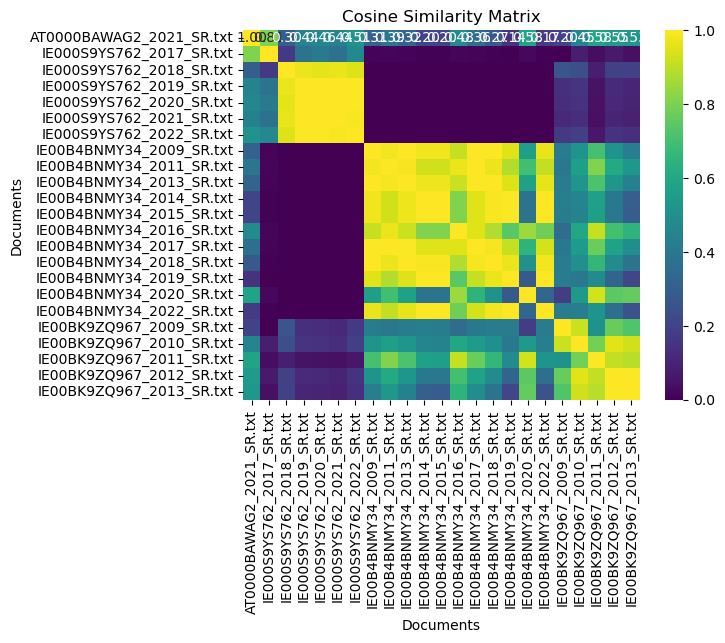

In [65]:
# Plot the cosine similarity matrix as a heatmap
sns.heatmap(dense_cosine_sim_matrix, cmap='viridis', annot=True, fmt=".2f", xticklabels=file_names, yticklabels=file_names)
plt.title('Cosine Similarity Matrix')
plt.xlabel('Documents')
plt.ylabel('Documents')
plt.show()

In [66]:
from scipy.cluster import hierarchy

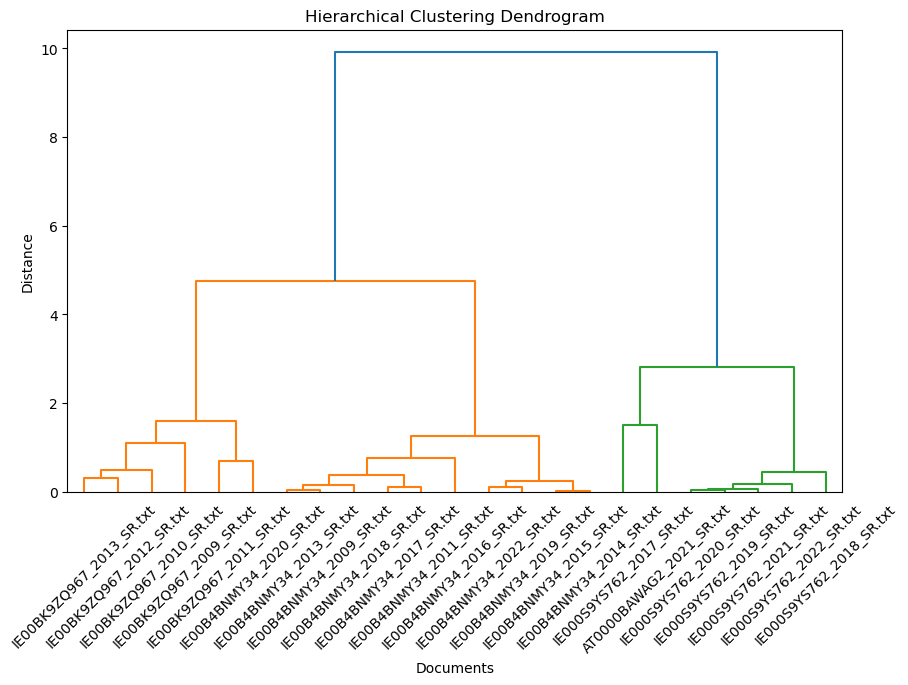

In [67]:
# Compute hierarchical clustering
linkage_matrix = hierarchy.linkage(dense_cosine_sim_matrix, method='ward')

# Plot the hierarchical clustering dendrogram
plt.figure(figsize=(10, 6))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=file_names, orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Documents')
plt.ylabel('Distance')
plt.show()

In [75]:
# Print the topics from the LDA model
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(f'Topic {topic[0]}: {topic[1]}')

Topic 0: 0.013*"linde" + 0.009*"report" + 0.007*"development" + 0.007*"employees" + 0.006*"sustainable" + 0.006*"management" + 0.006*"sustainability" + 0.006*"business" + 0.005*"global" + 0.005*"also"
Topic 1: 0.014*"linde" + 0.008*"development" + 0.007*"report" + 0.007*"sustainable" + 0.006*"see" + 0.006*"business" + 0.006*"emissions" + 0.005*"global" + 0.005*"management" + 0.005*"lindes"
Topic 2: 0.010*"business" + 0.007*"accenture" + 0.007*"global" + 0.007*"report" + 0.006*"people" + 0.006*"energy" + 0.005*"linde" + 0.005*"sustainability" + 0.004*"management" + 0.004*"development"
Topic 3: 0.009*"report" + 0.007*"business" + 0.006*"sustainable" + 0.006*"accenture" + 0.006*"development" + 0.005*"people" + 0.005*"percent" + 0.005*"linde" + 0.005*"employees" + 0.004*"emissions"
Topic 4: 0.008*"report" + 0.008*"linde" + 0.008*"employees" + 0.007*"development" + 0.007*"business" + 0.006*"sustainable" + 0.005*"sustainability" + 0.005*"energy" + 0.005*"people" + 0.005*"global"
